## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，再使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## Wine資料訓練與模型選擇

In [2]:
wine = datasets.load_wine()
wine.data.shape

(178, 13)

In [3]:
# 取wine.data當中的一個特徵
X = wine.data[:, np.newaxis, 6]
X.shape

(178, 1)

In [4]:
# 從wine.target的結果來看，可以判斷這是一個分類的資料集。
# 因此需使用Logistic_Regression()模型訓練
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.target.shape

(178,)

In [6]:
# 切分訓練集/測試集
train_X, test_X, train_y, test_y = train_test_split(X, wine.target, test_size= 0.1, random_state=1)

In [7]:
# 使用迴歸模型看看結果

# 建立模型
L_regr = linear_model.LinearRegression()

# 將訓練資料與模型擬合
L_regr.fit(train_X, train_y)

pred = L_regr.predict(test_X)

In [8]:
# 可以看回歸模型的參數值
print('Coefficients: ', L_regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred))

Coefficients:  [-0.64624639]
Mean squared error: 0.10


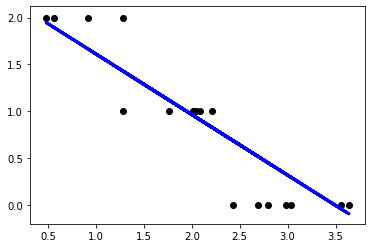

In [9]:
# 畫出回歸模型與實際資料的分佈，可以發現怪怪的。
plt.scatter(test_X, test_y, color='black')
plt.plot(test_X, pred, color='blue', linewidth=3)
plt.show()

In [10]:
# 使用分類模型看看結果

# 建立模型
Logi_regr = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')

# 將訓練資料與模型擬合
Logi_regr.fit(train_X ,train_y)

pred = Logi_regr.predict(test_X)

In [11]:
acc = accuracy_score(test_y, pred)
print("Accuracy: ", acc)

Accuracy:  0.8888888888888888


## Boston資料訓練與模型選擇

In [12]:
boston = datasets.load_boston()

In [13]:
boston.data.shape

(506, 13)

In [14]:
X = boston.data[:, np.newaxis, 12]
X.shape

(506, 1)

In [15]:
# 從boston.target的結果來看，可以判斷這是一個分類的資料集。
# 因此需使用Linear_Regression()模型訓練
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
boston.target.shape

(506,)

In [17]:
# 切分訓練集/測試集
train_X, test_X, train_y, test_y = train_test_split(X, boston.target, test_size= 0.1, random_state=1)

In [18]:
# 建立模型
L_regr = linear_model.LinearRegression()

# 將訓練資料與模型擬合
L_regr.fit(train_X, train_y)

pred = L_regr.predict(test_X)

In [19]:
# 可以看回歸模型的參數值
print('Coefficients: ', L_regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred))

Coefficients:  [-0.9363292]
Mean squared error: 42.98


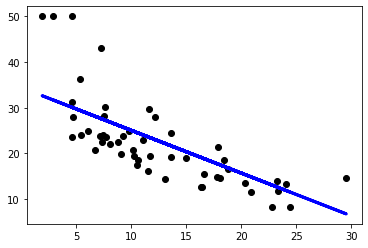

In [20]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(test_X, test_y, color='black')
plt.plot(test_X, pred, color='blue', linewidth=3)
plt.show()

## Breast Cancer資料訓練與模型選擇

In [21]:
breast_cancer = datasets.load_breast_cancer()

In [22]:
breast_cancer.data.shape

(569, 30)

In [23]:
# 從wine.target的結果來看，可以判斷這是一個分類的資料集。
# 因此需使用Logistic_Regression()模型訓練
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
X = breast_cancer.data[:, np.newaxis, 0]
X.shape

(569, 1)

In [25]:
train_X, test_X, train_y, test_y = train_test_split(X, breast_cancer.target, test_size=0.1, random_state=1)

# 建立模型
Logi_regr = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')

# 擬合模型
Logi_regr.fit(train_X, train_y)

pred = Logi_regr.predict(test_X)

In [26]:
acc = accuracy_score(test_y, pred)
print("Accuracy: ", acc)

Accuracy:  0.9298245614035088
